In [44]:

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import numpy as np

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

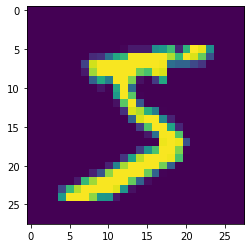

In [36]:
plt.imshow(X_train[0])

In [37]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [38]:
#one-hot encode target colum
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [39]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size= (3,3), activation='relu', input_shape=(28,28,1), padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), strides =2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [41]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 108s 58ms/step - loss: 0.3118 - accuracy: 0.9400 - val_loss: 0.0662 - val_accuracy: 0.9788
Epoch 2/3
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0700 - accuracy: 0.9787 - val_loss: 0.0785 - val_accuracy: 0.9777
Epoch 3/3
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0551 - accuracy: 0.9829 - val_loss: 0.0643 - val_accuracy: 0.9804


In [42]:
model.save('model.h5')

In [45]:
model=load_model('model.h5')

In [47]:
y_hat = model.predict(X_test[:4]) #du doan duoi dang softmax
y_hat

array([[2.8529925e-11, 3.2108871e-12, 9.1809113e-08, 5.7280886e-08,
        1.8189101e-12, 2.0050246e-10, 1.8694495e-16, 9.9999988e-01,
        4.0212719e-10, 4.7389982e-08],
       [4.2338747e-06, 2.8671032e-08, 9.9999392e-01, 1.1632011e-08,
        4.5629715e-12, 8.5245542e-13, 1.8007596e-06, 2.8646828e-11,
        1.9487461e-08, 1.1415527e-10],
       [1.1260877e-06, 9.9980730e-01, 1.7148481e-06, 2.9358500e-07,
        5.8415062e-06, 6.3109660e-06, 5.0646893e-05, 1.1558827e-05,
        6.2712097e-05, 5.2499956e-05],
       [9.8693317e-01, 2.6871004e-11, 1.0813841e-05, 1.4267702e-08,
        4.3971010e-08, 2.7880928e-05, 1.3005954e-02, 5.0444271e-08,
        2.1962476e-05, 1.4348502e-07]], dtype=float32)

In [48]:
y_lable = np.argmax(y_hat, axis = 1)
y_lable

array([7, 2, 1, 0])

In [49]:
(X_train, y_train), (X_test1, y_test) = mnist.load_data()
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)